In [219]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

## Import the Data from Local Storage

In [143]:
df=pd.read_csv("consumer_complaints.csv")

/Users/timothy/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning:

Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


## Exploring the Data 

In [ ]:
results_submitted_via = set()
df_finance_test['issue'].str.lower().str.split().apply(results_submitted_via.update)
print(results_submitted_via)

## Define the Searched Items 

In [246]:
# Define the searched items
finance_words=['loan','deposits','withdrawals','payments','credit','debt','broker','checks','atm','card','fraud']
print(finance_words)

['loan', 'deposits', 'withdrawals', 'payments', 'credit', 'debt', 'broker', 'checks', 'atm', 'card', 'fraud']


# Checking the data for missing values

In [220]:
df_subsample=df[:]
df_subsample.info() #There are zero nan values in the issues and furhter cleaning is not required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

# Drops columns that are note needed

In [221]:
del df_subsample['company_public_response']
del df_subsample['consumer_complaint_narrative']
del df_subsample['complaint_id']
del df_subsample['tags']
del df_subsample['consumer_consent_provided']
del df_subsample['zipcode']
del df_subsample['company']
del df_subsample['company_response_to_consumer']
del df_subsample['product']

## Seach for the Items & Slicing the Data

In [222]:
found_finance=[]
# find the indexes where the criteria are fulfilled 
for i in range(len(df_subsample)):
    for word in finance_words:
        if word in str(df_subsample['issue'][i:i+1]):
            if i in found_finance:
                continue
            else:
                found_finance.append(i)
# Slice the dataset according to the found indexes
list_of_indexes = found_finance
df_finance = df_subsample.iloc[list_of_indexes, :]
if len(found_finance) == len(df_finance):
    print('Success - Data Frame created and contains ', len(df_finance), ' Data Points')
else:
    print('Error - Data dimensions are not matching')

Success - Data Frame created and contains  267888  Data Points


### Ideas
- select all the finance realted data 
- analyse the occurance py chart --> where they solved?? Mark with colour in same chart 
- from what sources did they came --> online or letter

### Create copy of df to test and add columns with issues to dataframe

In [223]:
df_finance_test=df_finance.copy()
df_finance_test[finance_words]=0

#### Add Years Column

In [224]:
df_finance_test['years']=0

In [225]:
for i,date in enumerate(df_finance_test['date_received']):
    investi_date=str(date)
    #investi_date=str(df_finance_test['date_received'][i:i+1].values)
    investi_date_new=investi_date[-4:]
    df_finance_test['years'][i:i+1]=investi_date_new

<ipython-input-225-4fcbdc4b6dbf>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Transform Column text to lower case 

In [226]:
df_finance_test['issue']=df_finance_test['issue'].str.lower()

### Hot key encoding of the issues

In [228]:
found_finance=[]
# find the indexes where the criteria are fulfilled 
for i in range(len(df_finance_test)):
    for word in finance_words:
        if word in str(df_finance_test['issue'][i:i+1]):
            df_finance_test[str(word)][i:i+1]=1

<ipython-input-228-cf7c1414d1d7>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [229]:
percent_finance_results_description=[]
percent_finance_results=[]

for word in finance_words:
    percent_finance_results_description.append(str(word))
    percent_finance_results_description.append(df_finance_test[str(word)].sum()/len(df_finance_test))
    percent_finance_results.append(df_finance_test[str(word)].sum()/len(df_finance_test))
print(percent_finance_results)

[0.31153317804455594, 0.06418727229289853, 0.06418727229289853, 0.24534506958131758, 0.30858791733858926, 0.23715507973481456, 0.04967001134802604, 0.0004218180732246312, 0.01612614226841068, 0.02809009735411814, 0.0]


In [230]:
print(percent_finance_results_description)

['loan', 0.31153317804455594, 'deposits', 0.06418727229289853, 'withdrawals', 0.06418727229289853, 'payments', 0.24534506958131758, 'credit', 0.30858791733858926, 'debt', 0.23715507973481456, 'broker', 0.04967001134802604, 'checks', 0.0004218180732246312, 'atm', 0.01612614226841068, 'card', 0.02809009735411814, 'fraud', 0.0]


## Visualization of the issues

In [248]:
print(finance_words)

['loan', 'deposits', 'withdrawals', 'payments', 'credit', 'debt', 'broker', 'checks', 'atm', 'card', 'fraud']


In [231]:
labels = finance_words
values = percent_finance_results

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

### Find all submitted sources

In [232]:
results_submitted_via = set()
df_finance_test['submitted_via'].str.lower().str.split().apply(results_submitted_via.update)
print(results_submitted_via)

{'web', 'phone', 'mail', 'postal', 'fax', 'referral', 'email'}


In [233]:
#Create list out of results
results_submitted=[]
for i in results_submitted_via:
    results_submitted.append(i)
print(results_submitted)

['web', 'phone', 'mail', 'postal', 'fax', 'referral', 'email']


### Add Columns for hot key encoding

In [249]:
df_finance_test[results_submitted]=0

### Count the amount of submitted sources

In [252]:
df_finance_test['submitted_via']=df_finance_test['submitted_via'].str.lower()
# find the indexes where the criteria are fulfilled 
for i in range(len(df_finance_test)):
    for word in results_submitted:
        if word in str(df_finance_test['submitted_via'][i:i+1]):
            df_finance_test[str(word)][i:i+1]=1

<ipython-input-252-81f3f86bbb1a>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Caluclate percentage values of the submitted analysis

In [253]:
percent_submitted=[]
percent_submitted_results=[]

for word in results_submitted:
    percent_submitted.append(str(word))
    percent_submitted.append(df_finance_test[str(word)].sum()/len(df_finance_test))
    percent_submitted_results.append(df_finance_test[str(word)].sum()/len(df_finance_test))
print(percent_submitted)
print(percent_submitted_results)
print(sum(percent_submitted_results))
print(percent_submitted_results)

['web', 0.6909006749089172, 'phone', 0.06534447231678911, 'mail', 0.0805747177925103, 'postal', 0.08007077584662246, 'fax', 0.01350191124649107, 'referral', 0.14967822373529235, 'email', 0.0005039419458878337]
[0.6909006749089172, 0.06534447231678911, 0.0805747177925103, 0.08007077584662246, 0.01350191124649107, 0.14967822373529235, 0.0005039419458878337]
1.0805747177925102
[0.6909006749089172, 0.06534447231678911, 0.0805747177925103, 0.08007077584662246, 0.01350191124649107, 0.14967822373529235, 0.0005039419458878337]


In [254]:
submitted_results_labels=results_submitted.copy()
print(submitted_results_labels)
submitted_results_labels.pop(3)
submitted_results_labels.pop(-1)
print(submitted_results_labels)

['web', 'phone', 'mail', 'postal', 'fax', 'referral', 'email']
['web', 'phone', 'mail', 'fax', 'referral']


In [255]:
percent_submitted_results_final=percent_submitted_results.copy()
print(percent_submitted_results_final)
percent_submitted_results_final.pop(3)
percent_submitted_results_final.pop(-1)
print(percent_submitted_results_final)

[0.6909006749089172, 0.06534447231678911, 0.0805747177925103, 0.08007077584662246, 0.01350191124649107, 0.14967822373529235, 0.0005039419458878337]
[0.6909006749089172, 0.06534447231678911, 0.0805747177925103, 0.01350191124649107, 0.14967822373529235]


## Visualisation of the submitted sources

In [256]:
labels = submitted_results_labels
values = percent_submitted_results_final

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

## Analysis over the last years

In [257]:
#Finding the years
results_submitted_via = set()
df_finance_test['years'].str.lower().str.split().apply(results_submitted_via.update)
print(results_submitted_via)

{'2011', '2012', '2013', '2014', '2015', '2016'}


,Data Amount
2011,631
2012,24025
2013,45869
2014,79753
2015,89595
2016,28015


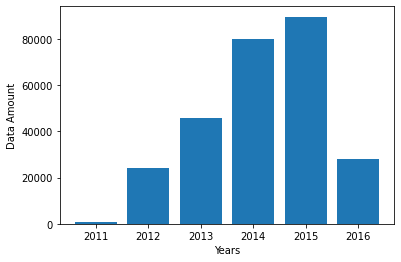

In [321]:
#count the number of values for each year
value_count_years=df_finance_test['years'].value_counts()
df_years_disp=pd.DataFrame(value_count_years.values,index=value_count_years.index,columns=['Data Amount'])
df_years_disp=df_years_disp.iloc[::-1]
df_years_disp = df_years_disp.sort_index(ascending=True)
import matplotlib.pyplot as plt
plt.bar(df_years_disp.index,df_years_disp['Data Amount'])
plt.xlabel('Years')
plt.ylabel('Data Amount')
df_years_disp

In [70]:
year_count=df_finance_test['years'].value_counts()
print('increase in percent from 2013 to 2014 --> ', 1- (year_count[1]/sum(year_count)))

increase in percent from 2013 to 2014 -->  0.5772558714462299


In [271]:
# selecting rows based on condition
df_2011 = df_finance_test[df_finance_test['years'] == "2011"]
df_2012 = df_finance_test[df_finance_test['years'] == "2012"]
df_2013 = df_finance_test[df_finance_test['years'] == "2013"]
df_2014 = df_finance_test[df_finance_test['years'] == "2014"]
df_2015 = df_finance_test[df_finance_test['years'] == "2015"]
df_2016 = df_finance_test[df_finance_test['years'] == "2016"]
df_years=[df_2011,df_2012,df_2013,df_2014,df_2015,df_2016]

In [274]:
#Finding the years
issues_2013 = set()
df_2013['issue'].str.lower().str.split().apply(issues_2013.update)
print(issues_2013)

{'verification', 'apply', 'get', 'unable', 'shopping', 'report/credit', 'atm', 'making/receiving', 'disclosure', 'payment', 'improper', 'collect', "can't", 'escrow', 'owed', 'taking', 'score', 'convenience', 'the', 'and', 'managing', 'i', 'payments,', 'for', 'loan/did', 'repay', 'line', 'repaying', 'mortgage', 'information', 'withdrawals', 'lease', 'servicing,', 'your', 'broker', 'out', 'credited', "didn't", 'attempts', 'unsolicited', 'protection', 'loan', 'money', 'originator,', 'or', 'of', 'receive', 'card', 'received', 'debit', 'getting', 'my', 'report', 'to', 'debt', 'application,', 'acct', 'sending', 'a', 'credit', 'incorrect', 'on', 'not', 'checks', 'deposits', '/', "cont'd", 'account', 'issuance', 'collection', 'applied', 'using', 'dispute', 'use'}


In [275]:
df_years_percent_values=[]
df_years_percent_labels=[]
for year in df_years:
    percent_submitted=[]
    percent_submitted_results=[]
    percent_submitted_labels_intermed=[]
    for word in finance_words: 
        percent_submitted.append(str(word))
        percent_submitted.append(year[str(word)].sum()/len(year))
        percent_submitted_results.append(year[str(word)].sum())
        percent_submitted_labels_intermed.append(word)
    #Finding the years
    issues_years = set()
    year['issue'].str.lower().str.split().apply(issues_years.update)
    df_years_percent_values.append(percent_submitted_results)
    df_years_percent_labels.append(percent_submitted_labels_intermed)

In [276]:
print(df_years_percent_labels)

[['loan', 'deposits', 'withdrawals', 'payments', 'credit', 'debt', 'broker', 'checks', 'atm', 'card', 'fraud'], ['loan', 'deposits', 'withdrawals', 'payments', 'credit', 'debt', 'broker', 'checks', 'atm', 'card', 'fraud'], ['loan', 'deposits', 'withdrawals', 'payments', 'credit', 'debt', 'broker', 'checks', 'atm', 'card', 'fraud'], ['loan', 'deposits', 'withdrawals', 'payments', 'credit', 'debt', 'broker', 'checks', 'atm', 'card', 'fraud'], ['loan', 'deposits', 'withdrawals', 'payments', 'credit', 'debt', 'broker', 'checks', 'atm', 'card', 'fraud'], ['loan', 'deposits', 'withdrawals', 'payments', 'credit', 'debt', 'broker', 'checks', 'atm', 'card', 'fraud']]


In [280]:
#Crate the results for the years
    #2011
years_list=['2011']*len(df_years_percent_labels[0])
df_dic_2011={'years':years_list,'issue':df_years_percent_labels[0],'count':df_years_percent_values[0]}
print(df_dic_2011)
    #2012
years_list=['2012']*len(df_years_percent_labels[1])
df_dic_2012={'years':years_list,'issue':df_years_percent_labels[1],'count':df_years_percent_values[1]}
print(df_dic_2014)
    #2013
years_list=['2013']*len(df_years_percent_labels[2])
df_dic_2013={'years':years_list,'issue':df_years_percent_labels[2],'count':df_years_percent_values[2]}
    #2014
years_list=['2014']*len(df_years_percent_labels[3])
df_dic_2014={'years':years_list,'issue':df_years_percent_labels[3],'count':df_years_percent_values[3]}
    #2015
years_list=['2015']*len(df_years_percent_labels[4])
df_dic_2015={'years':years_list,'issue':df_years_percent_labels[4],'count':df_years_percent_values[4]}
    #2016
years_list=['2016']*len(df_years_percent_labels[5])
df_dic_2016={'years':years_list,'issue':df_years_percent_labels[5],'count':df_years_percent_values[5]}

{'years': ['2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011'], 'issue': ['loan', 'deposits', 'withdrawals', 'payments', 'credit', 'debt', 'broker', 'checks', 'atm', 'card', 'fraud'], 'count': [379, 0, 0, 379, 59, 83, 152, 2, 0, 59, 0]}
{'years': ['2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014'], 'issue': ['loan', 'deposits', 'withdrawals', 'payments', 'credit', 'debt', 'broker', 'checks', 'atm', 'card', 'fraud'], 'count': [12941, 3483, 3483, 10757, 2483, 1166, 2738, 34, 713, 1485, 0]}


In [284]:
df_final_2011=pd.DataFrame(df_dic_2011,columns=['years','issue','count'])
df_final_2012=pd.DataFrame(df_dic_2012,columns=['years','issue','count'])
df_final_2013=pd.DataFrame(df_dic_2013,columns=['years','issue','count'])
df_final_2014=pd.DataFrame(df_dic_2014,columns=['years','issue','count'])
df_final_2015=pd.DataFrame(df_dic_2015,columns=['years','issue','count'])
df_final_2016=pd.DataFrame(df_dic_2016,columns=['years','issue','count'])
frames = [df_final_2011,df_final_2012,df_final_2013,df_final_2014, df_final_2015,df_final_2016]
df_result = pd.concat(frames)
df_result=df_result[df_result['issue'] != "postal"]
df_result=df_result[df_result['issue'] != "email"]
df_result.reset_index(drop=True, inplace=True)
df_result

,years,issue,count
0,2011,loan,379
1,2011,deposits,0
2,2011,withdrawals,0
3,2011,payments,379
4,2011,credit,59
...,...,...,...
61,2016,broker,979
62,2016,checks,4
63,2016,atm,350
64,2016,card,597


In [286]:
df_result.to_csv('results.csv', sep=';')

In [287]:
fig = px.bar(df_result, x="years", y="count", color="issue",title="Development of the issues over the year")
fig.show()

# Anlayse the time trend over the year of the submitted sources

In [293]:
df_years_percent_values=[]
df_years_percent_labels=[]
for year in df_years:
    percent_submitted=[]
    percent_submitted_results=[]
    percent_submitted_labels_intermed=[]
    for word in submitted_results_labels: 
        percent_submitted.append(str(word))
        percent_submitted.append(year[str(word)].sum()/len(year))
        percent_submitted_results.append(year[str(word)].sum())
        percent_submitted_labels_intermed.append(word)
    #Finding the years
    issues_years = set()
    year['submitted_via'].str.lower().str.split().apply(issues_years.update)
    df_years_percent_values.append(percent_submitted_results)
    df_years_percent_labels.append(percent_submitted_labels_intermed)

In [295]:
#Crate the results for the years
    #2011
years_list=['2011']*len(df_years_percent_labels[0])
df_dic_2011={'years':years_list,'submitted_via':df_years_percent_labels[0],'count':df_years_percent_values[0]}
print(df_dic_2011)
    #2012
years_list=['2012']*len(df_years_percent_labels[1])
df_dic_2012={'years':years_list,'submitted_via':df_years_percent_labels[1],'count':df_years_percent_values[1]}
print(df_dic_2014)
    #2013
years_list=['2013']*len(df_years_percent_labels[2])
df_dic_2013={'years':years_list,'submitted_via':df_years_percent_labels[2],'count':df_years_percent_values[2]}
    #2014
years_list=['2014']*len(df_years_percent_labels[3])
df_dic_2014={'years':years_list,'submitted_via':df_years_percent_labels[3],'count':df_years_percent_values[3]}
    #2015
years_list=['2015']*len(df_years_percent_labels[4])
df_dic_2015={'years':years_list,'submitted_via':df_years_percent_labels[4],'count':df_years_percent_values[4]}
    #2016
years_list=['2016']*len(df_years_percent_labels[5])
df_dic_2016={'years':years_list,'submitted_via':df_years_percent_labels[5],'count':df_years_percent_values[5]}

{'years': ['2011', '2011', '2011', '2011', '2011'], 'submitted_via': ['web', 'phone', 'mail', 'fax', 'referral'], 'count': [429, 72, 18, 1, 111]}
{'years': ['2014', '2014', '2014', '2014', '2014'], 'submitted_via': ['web', 'phone', 'mail', 'fax', 'referral'], 'count': [56157, 4692, 7514, 1161, 10229]}


In [296]:
df_final_2011=pd.DataFrame(df_dic_2011,columns=['years','submitted_via','count'])
df_final_2012=pd.DataFrame(df_dic_2012,columns=['years','submitted_via','count'])
df_final_2013=pd.DataFrame(df_dic_2013,columns=['years','submitted_via','count'])
df_final_2014=pd.DataFrame(df_dic_2014,columns=['years','submitted_via','count'])
df_final_2015=pd.DataFrame(df_dic_2015,columns=['years','submitted_via','count'])
df_final_2016=pd.DataFrame(df_dic_2016,columns=['years','submitted_via','count'])
frames = [df_final_2011,df_final_2012,df_final_2013,df_final_2014, df_final_2015,df_final_2016]
df_result = pd.concat(frames)
df_result=df_result[df_result['submitted_via'] != "postal"]
df_result=df_result[df_result['submitted_via'] != "email"]
df_result.reset_index(drop=True, inplace=True)
df_result

,years,submitted_via,count
0,2011,web,429
1,2011,phone,72
2,2011,mail,18
3,2011,fax,1
4,2011,referral,111
5,2012,web,12132
6,2012,phone,2308
7,2012,mail,1324
8,2012,fax,210
9,2012,referral,8051


In [298]:
fig = px.bar(df_result, x="years", y="count", color="submitted_via",title="Development of the submitted sources over the year")
fig.show()

### Analyse the occurrence in the states

In [269]:
count_states=df_finance_test['state'].value_counts()
count_states_labels=[]
count_states_values=[]
for i in range(len(count_states)):
    count_states_labels.append(count_states.index[i])
    count_states_values.append(count_states[i])
count_states_values[:] = [x / sum(count_states_values) for x in count_states_values]
count_states_values[:] = [x * 100 for x in count_states_values]
count_states_values[:] = [round(num, 1) for num in count_states_values]
print(count_states_labels)
print(count_states_values)

['CA', 'FL', 'TX', 'NY', 'GA', 'NJ', 'PA', 'IL', 'VA', 'OH', 'MD', 'NC', 'MI', 'AZ', 'WA', 'MA', 'CO', 'TN', 'SC', 'MO', 'NV', 'OR', 'IN', 'CT', 'AL', 'MN', 'WI', 'LA', 'KY', 'OK', 'DC', 'NM', 'UT', 'DE', 'KS', 'MS', 'AR', 'IA', 'NH', 'ID', 'HI', 'RI', 'ME', 'NE', 'PR', 'WV', 'MT', 'VT', 'SD', 'AK', 'WY', 'ND', 'AE', 'AP', 'VI', 'GU', 'FM', 'MP', 'MH', 'AS', 'PW', 'AA']
[13.8, 9.6, 8.9, 6.7, 4.5, 3.9, 3.7, 3.6, 3.4, 3.1, 3.1, 2.7, 2.4, 2.2, 2.1, 1.9, 1.8, 1.6, 1.4, 1.3, 1.3, 1.2, 1.2, 1.1, 1.1, 1.1, 1.1, 1.0, 0.8, 0.7, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [299]:
choropleth = go.Choropleth(
    locations=count_states_labels,
    locationmode='USA-states',
    z = count_states_values,
    zmin = 0,
    zmax = max(count_states_values),
    
    autocolorscale=False,
    text='Customer Issues', 
    marker_line_color='white',
    colorbar_title="Occurrence Rate in %"
)
fig = go.Figure(data=choropleth)

fig.update_layout(
    title_text='Customer Issues per State in %',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

# Test

In [ ]:
# Define the searched items
finance_words=['Loan','loan','Deposits','deposits','Withdrawals','withdrawals','Payments','payments','Credit','credit']

found_finance=[]

# find the indexes where the criteria are fulfilled 
for i in range(len(df_finance_test)):
    for word in finance_words:
        if word in str(df_finance_test['issue'][i:i+1]):
            if i in found_finance:
                continue
            else:
                found_finance.append(i)
# Slice the dataset according to the found indexes
list_of_indexes = found_finance
df_finance = df_subsample.iloc[list_of_indexes, :]

In [44]:
#divide between years
df_2013=[]
for i,date in enumerate(df_finance_test['date_received']):
    if '2013' in str(date):
        df_2013.append(i)
print(len(df_2013))
    #df_finance_test['date_received'][i:i+1]

551


In [34]:
df_finance_test.loc[:,'year'] = pd.Series(, index=df_finance_test.index)
df_finance_test

SyntaxError: invalid syntax (<ipython-input-34-c5470fa8ec85>, line 1)

In [23]:
import plotly.graph_objects as go

labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [4500, 2500, 1053, 500]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [22]:
df = pd.DataFrame([
    ['Europe', 586098529, 'Absolute'], ['Asia', 3811953827, 'Absolute'],
    ['France', 61083916, 'Europe'], ['Germany', 82400996, 'Europe'], ['Italy', 58147733, 'Europe'],
    ['Spain', 40448191, 'Europe'], ['United Kingdom', 60776238, 'Europe'], ['Taiwan', 23174294, 'Asia'],
    ['Japan', 127467972, 'Asia'], ['Korean', 49044790, 'Asia'], ['China', 1318683096, 'Asia']],
    columns=['country', 'pop', 'continent'])
fig = px.sunburst(df, names='country', values='pop', parents='continent', title='Population')
fig.show()

In [20]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
    labels=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    values=[5, 14, 15, 30, 2, 6, 6, 4, 4],
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

In [8]:
import pandas as pd
import numpy as np
import plotly.express as px  

d = {'Customer': ['Cust 1', 'Cust 1', 'Cust 2', 'Cust 1', 'Cust 2', 'Cust 2', 'Cust 3', 'Cust 3','Cust 4', 'Cust 4', 'Cust 5', 'Cust 4','Cust 5', 'Cust 6', 'Cust 6', 'Cust 6'], 
         'Product': ['DIGITAL', 'DIGITAL', 'STORE', 'DIGITAL', 'DIGITAL', 'STORE', 'DIGITAL', 'DIGITAL', 'DIGITAL', 'DIGITAL', 'STORE', 'DIGITAL', 'STORE', 'DIGITAL', 'DIGITAL', 'STORE'], 
         'PO': ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16'],
         'Revenue': [100, 120, 240, 200, 110, 100, 120, 180, 100, 120, 240, 200, 110, 100, 120, 180]}
    
df = pd.DataFrame(data=d)

fig = px.sunburst(df, values='Revenue', path=['Product','Customer'])
fig.show()

In [9]:
import plotly.express as px
df = px.data.tips()
fig = px.sunburst(df, path=['sex', 'day', 'time'], values='total_bill', color='time')
fig.show()